# Longitudinal associations between stroke and psychosis: a population-based study of older adults

## Calculate Kaplan-Meier curves and Cox regression analyses

Load necessary packages

In [33]:
library(dplyr)
library(survival)
library(survminer)
library(gtsummary)
library(gt)
library(IRdisplay)
library(webshot2)

Load pre-processed dataframes created by Stroke_Psychosis_ELSA_Pre-processing.R

In [2]:
# Location of pre-processed dataframe files
transformed_data_dir = "/home/main/data/StrokePsychosisELSATransformedData/"

# Directory to store the generated figures as png files and the generated tables as html files. Must be writeable.
output_dir <- "/tmp/"

psychosisinstroke_surv_filename = paste(transformed_data_dir, "psychosisinstroke_surv.rda", sep="")
strokeinpsychosis_surv_filename = paste(transformed_data_dir, "strokeinpsychosis_surv.rda", sep="")
psychosisinstroke_imp_filename = paste(transformed_data_dir, "psychosisinstroke_imp.rda", sep="")
strokeinpsychosis_imp_filename = paste(transformed_data_dir, "strokeinpsychosis_imp.rda", sep="")

load(psychosisinstroke_surv_filename) # cc dataset
load(strokeinpsychosis_surv_filename) # cc dataset
load(psychosisinstroke_imp_filename) # MI dataset
load(strokeinpsychosis_imp_filename) # MI dataset

#### Define population

In [3]:
# Lower censoring, define value (i.e. minimum number of waves)
cens_low <- 0

psychosisinstroke_censored <- psychosisinstroke_surv %>%
  filter(fuptime >= cens_low)
psychosisinstroke_imp_censored <- psychosisinstroke_imp %>%
  filter(fuptime >= cens_low)
strokeinpsychosis_censored <- strokeinpsychosis_surv %>%
  filter(fuptime >= cens_low)
strokeinpsychosis_imp_censored <- strokeinpsychosis_imp %>%
  filter(fuptime >= cens_low)

In [4]:
# Upper censoring, define value
cens_high <- 10

psychosisinstroke_censored$fuptime[psychosisinstroke_censored$fuptime >= cens_high] <- cens_high
psychosisinstroke_imp_censored$fuptime[psychosisinstroke_censored$fuptime >= cens_high] <- cens_high
strokeinpsychosis_censored$fuptime[strokeinpsychosis_censored$fuptime >= cens_high] <- cens_high
strokeinpsychosis_imp_censored$fuptime[strokeinpsychosis_censored$fuptime >= cens_high] <- cens_high

In [5]:
# Set plot size
options(repr.plot.width=14, repr.plot.height=8)

### Psychosis Risk After Stroke Kaplain-Meier Plot 

Survival model

Call: survfit(formula = survobj ~ 1)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    0  19808      82    0.996 0.000456        0.995        0.997
    1  15176       3    0.996 0.000470        0.995        0.997
    2  15079      15    0.995 0.000535        0.994        0.996
    4  13099      18    0.993 0.000623        0.992        0.995
    6  11146      11    0.992 0.000689        0.991        0.994
    8   9312      11    0.991 0.000774        0.990        0.993
   10   8222      10    0.990 0.000862        0.988        0.992

Call: survfit(formula = Surv(fuptime, psychosisever_10) ~ strokeever_10, 
    data = psychosisinstroke_censored)

                strokeever_10=0 
 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    0  18529      68    0.996 0.000444        0.995        0.997
    2  14172      13    0.995 0.000511        0.994        0.996
    4  12386      13    0.994 0.000587        0.993        0.996
    6  10593      11    0.993 0.000664        0.992        0.995
    8   8903      11    0.992 0.000759        0.991        0.994
   10   7910      10    0.991 0.000856        0.989        0.993

                strokeever_10=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0   1279      14    0.989 0.00291        0.983        0.995
    1   1004       3    0.986 0.00336        0.980        0.993
    2    907       2    0.984 0.00369        0.977        0.991
    4    713       5    0.977 0.00478        0.968        0.986


Call:
survdiff(formula = Surv(fuptime, psychosisever_10) ~ strokeever_10, 
    data = psychosisinstroke_censored)

                    N Observed Expected (O-E)^2/E (O-E)^2/V
strokeever_10=0 18529      126   141.22      1.64      28.1
strokeever_10=1  1279       24     8.78     26.36      28.1

 Chisq= 28.1  on 1 degrees of freedom, p= 1e-07 

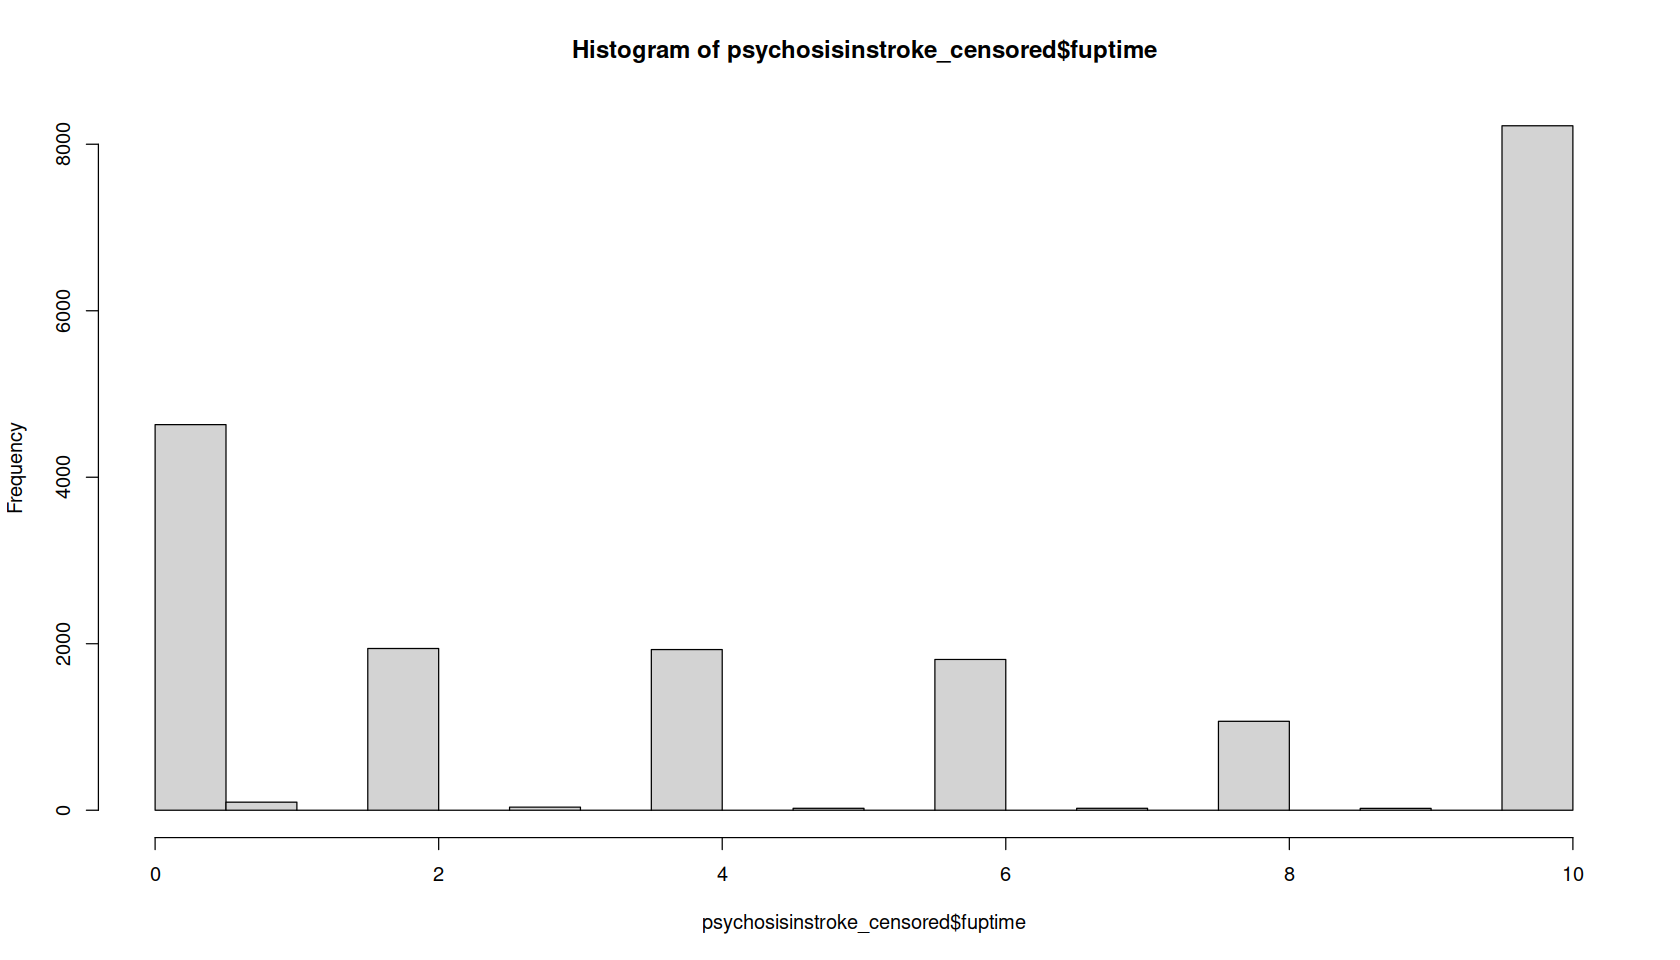

In [6]:
hist(psychosisinstroke_censored$fuptime)

# Fit survival model
survobj <- Surv(time = psychosisinstroke_censored$fuptime,
                event = psychosisinstroke_censored$psychosisever_10)

surv_fit <- survfit(survobj ~ 1)
summary(surv_fit)

psychosisinstroke_fit <- survfit(Surv(fuptime, psychosisever_10) ~ strokeever_10, data = psychosisinstroke_censored)
summary(psychosisinstroke_fit)

# Compute log rank test statistic (test of whether the curves are overlapping or not)
survdiff(
  Surv(fuptime, psychosisever_10) ~ strokeever_10,
  data = psychosisinstroke_censored
)

#### Figure 2. The cumulative incidence of psychosis in those reporting and not reporting stroke. 

Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


png 
  2

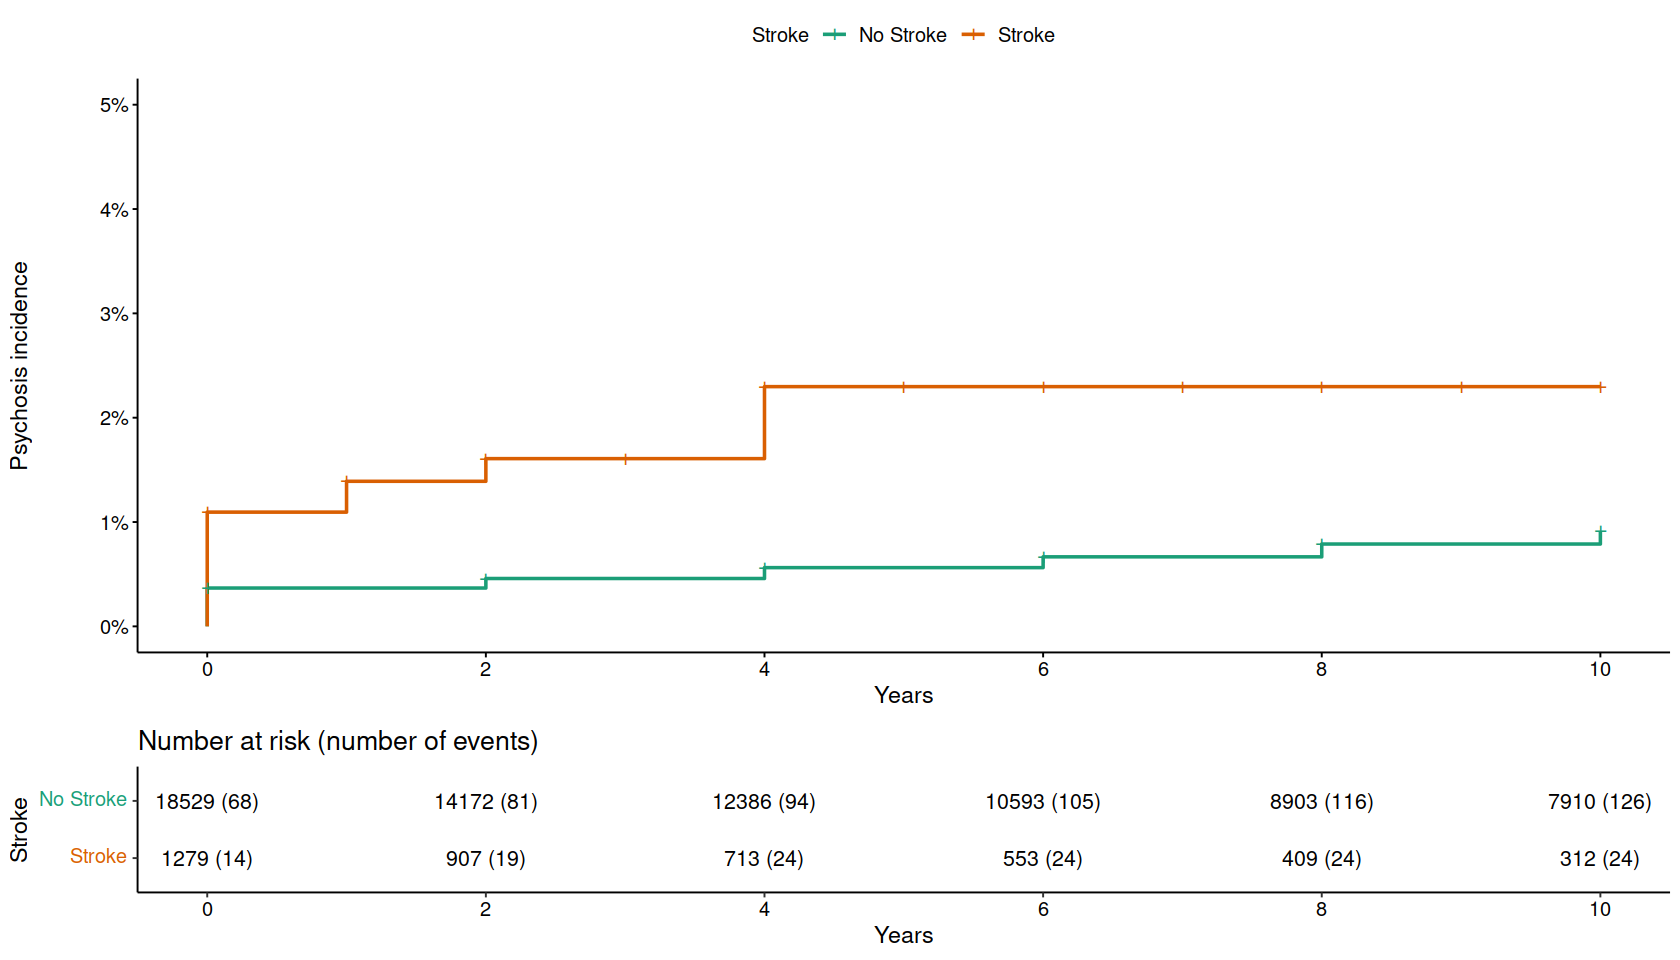

In [7]:
# Plot
figure_2 <- ggsurvplot(
  psychosisinstroke_fit,        # survival object already created above
  data = psychosisinstroke_censored,
  conf.int = FALSE,             # whether to display CIs on plot
  fun = "event",
  surv.scale = "percent",       # present probabilities in the y axis in %
  break.time.by = 2,            # present the time axis with an increment of 2 years
  xlab = "Years",
  ylab = "Psychosis incidence",
  ylim = c(0, .05),
  xlim = c(0, 10),
  pval = TRUE,                    # print p-value of Log-rank test
#  pval.coord = c(40,.91),        # print p-value at these plot coordinates
  risk.table = "nrisk_cumevents",                # print the risk table at bottom. abs_pct = absolute numbers and percentages. Can also use "absolute" or "percentage" alone.
  legend.title = "Stroke",       # legend characteristics
  legend.labs = c("No Stroke","Stroke"),
  font.legend = 12, 
  palette = "Dark2",             # specify color palette 
)

# Display
figure_2

# Save
png(file=paste(output_dir, '/', 'RB_et_al_Figure2.png', sep=''), width = 14, height = 8, units = 'in', res = 800)
figure_2
dev.off()

Calculate mean follow-up time by group

In [8]:
psychosisinstroke_censored %>%
  filter(psychosisever_10 == 1) %>%
  group_by(strokeever_10) %>%
  summarise(mean=mean(fuptime), sd = sd(fuptime), median = median(fuptime))

strokeever_10,mean,sd,median
<dbl>,<dbl>,<dbl>,<dbl>
0,2.634921,3.446977,0
1,1.125000,1.623536,0


### Stroke After Psychosis Kaplain-Meier Plot 

Model

Call: survfit(formula = survobj ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0  19808     710    0.964 0.00132        0.962        0.967
    2  14857     139    0.955 0.00151        0.952        0.958
    4  12997     129    0.946 0.00171        0.942        0.949
    6  11095     115    0.936 0.00192        0.932        0.940
    8   9278      98    0.926 0.00215        0.922        0.930
   10   8191      88    0.916 0.00237        0.911        0.921

Call: survfit(formula = Surv(fuptime, strokeever_10) ~ psychosisever_10, 
    data = strokeinpsychosis_censored)

                psychosisever_10=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0  19658     693    0.965 0.00132        0.962        0.967
    2  14752     137    0.956 0.00151        0.953        0.959
    4  12908     128    0.946 0.00171        0.943        0.950
    6  11029     114    0.937 0.00192        0.933        0.940
    8   9236      95    0.927 0.00214        0.923        0.931
   10   8159      88    0.917 0.00237        0.912        0.922

                psychosisever_10=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    0    150      17    0.887  0.0259        0.837        0.939
    2    105       2    0.870  0.0280        0.817        0.926
    4     89       1    0.860  0.0294        0.804        0.919
    6     66       1    0.847  0.0317        0.787        0.911
    8     42       3    0.786  0.0447        

Call:
survdiff(formula = Surv(fuptime, strokeever_10) ~ psychosisever_10, 
    data = strokeinpsychosis_censored)

                       N Observed Expected (O-E)^2/E (O-E)^2/V
psychosisever_10=0 19658     1255  1270.29     0.184      27.7
psychosisever_10=1   150       24     8.71    26.815      27.7

 Chisq= 27.7  on 1 degrees of freedom, p= 1e-07 

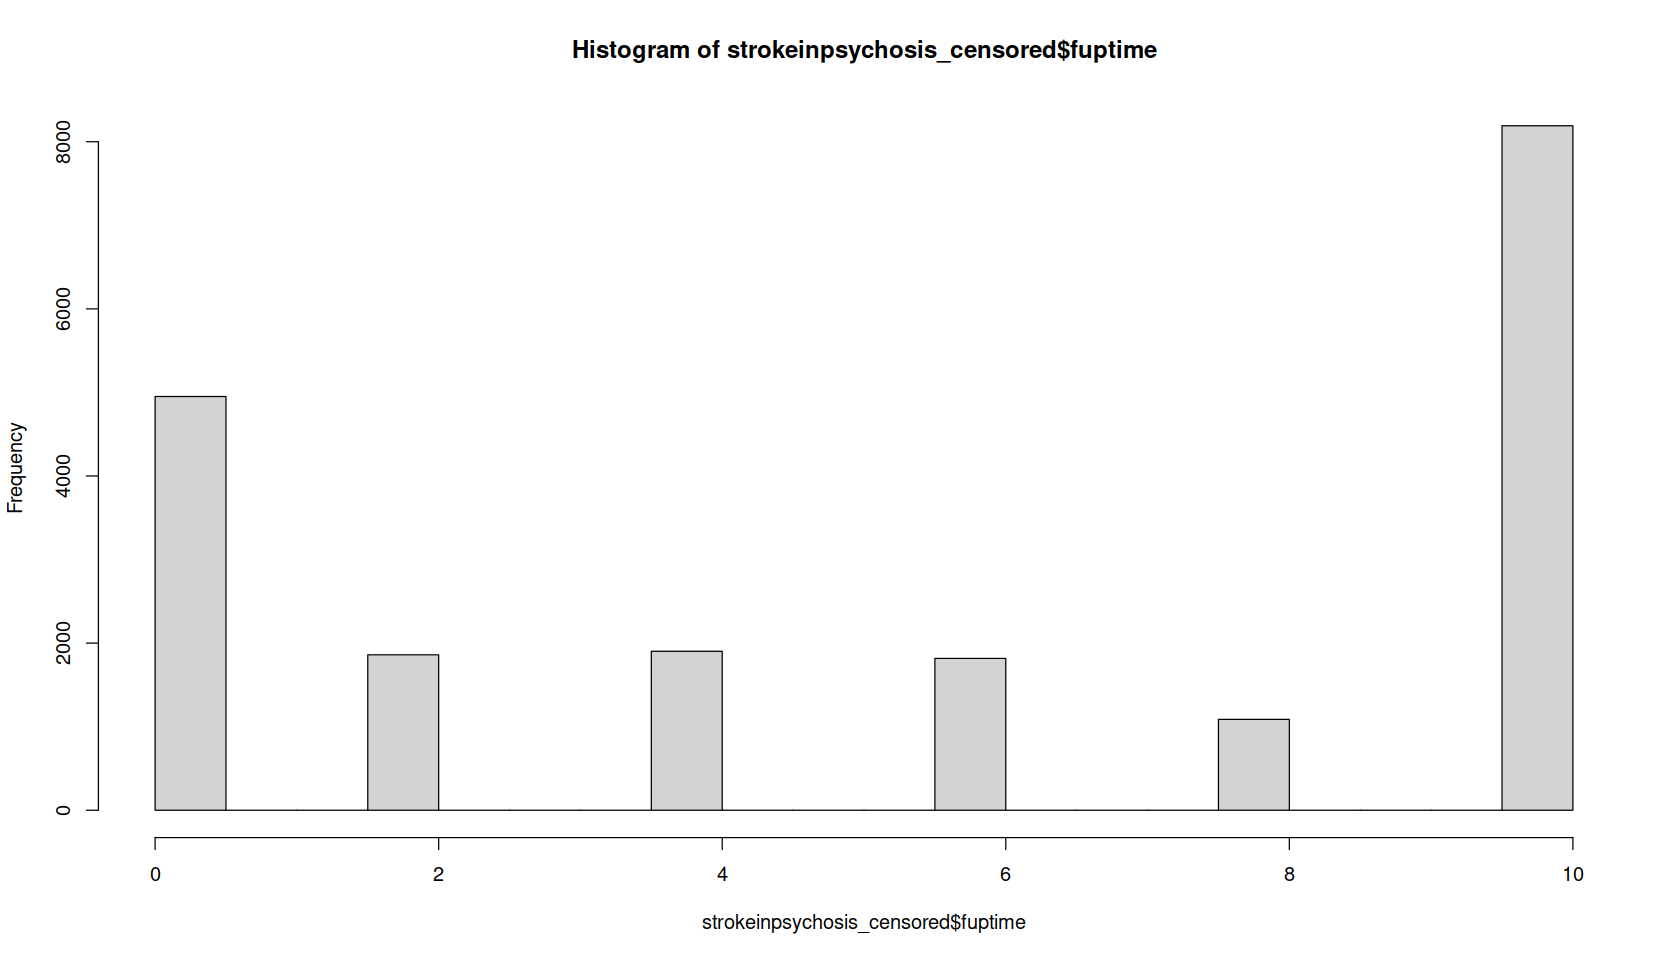

In [9]:
hist(strokeinpsychosis_censored$fuptime)

# Fit survival model
survobj <- Surv(time = strokeinpsychosis_censored$fuptime,
                event = strokeinpsychosis_censored$strokeever_10)

surv_fit <- survfit(survobj ~ 1)
summary(surv_fit)

strokeinpsychosis_fit <- survfit(Surv(fuptime, strokeever_10) ~ psychosisever_10, data = strokeinpsychosis_censored)
summary(strokeinpsychosis_fit) # not possible to calculate median survival here as not enough events accrued during follow-up to reach median

# Compute log rank test statistic (test of whether the curves are overlapping or not)
survdiff(
  Surv(fuptime, strokeever_10) ~ psychosisever_10,
  data = strokeinpsychosis_censored
)

#### Figure 1. The cumulative incidence of stroke in participants reporting and not reporting psychosis. 

Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


png 
  2

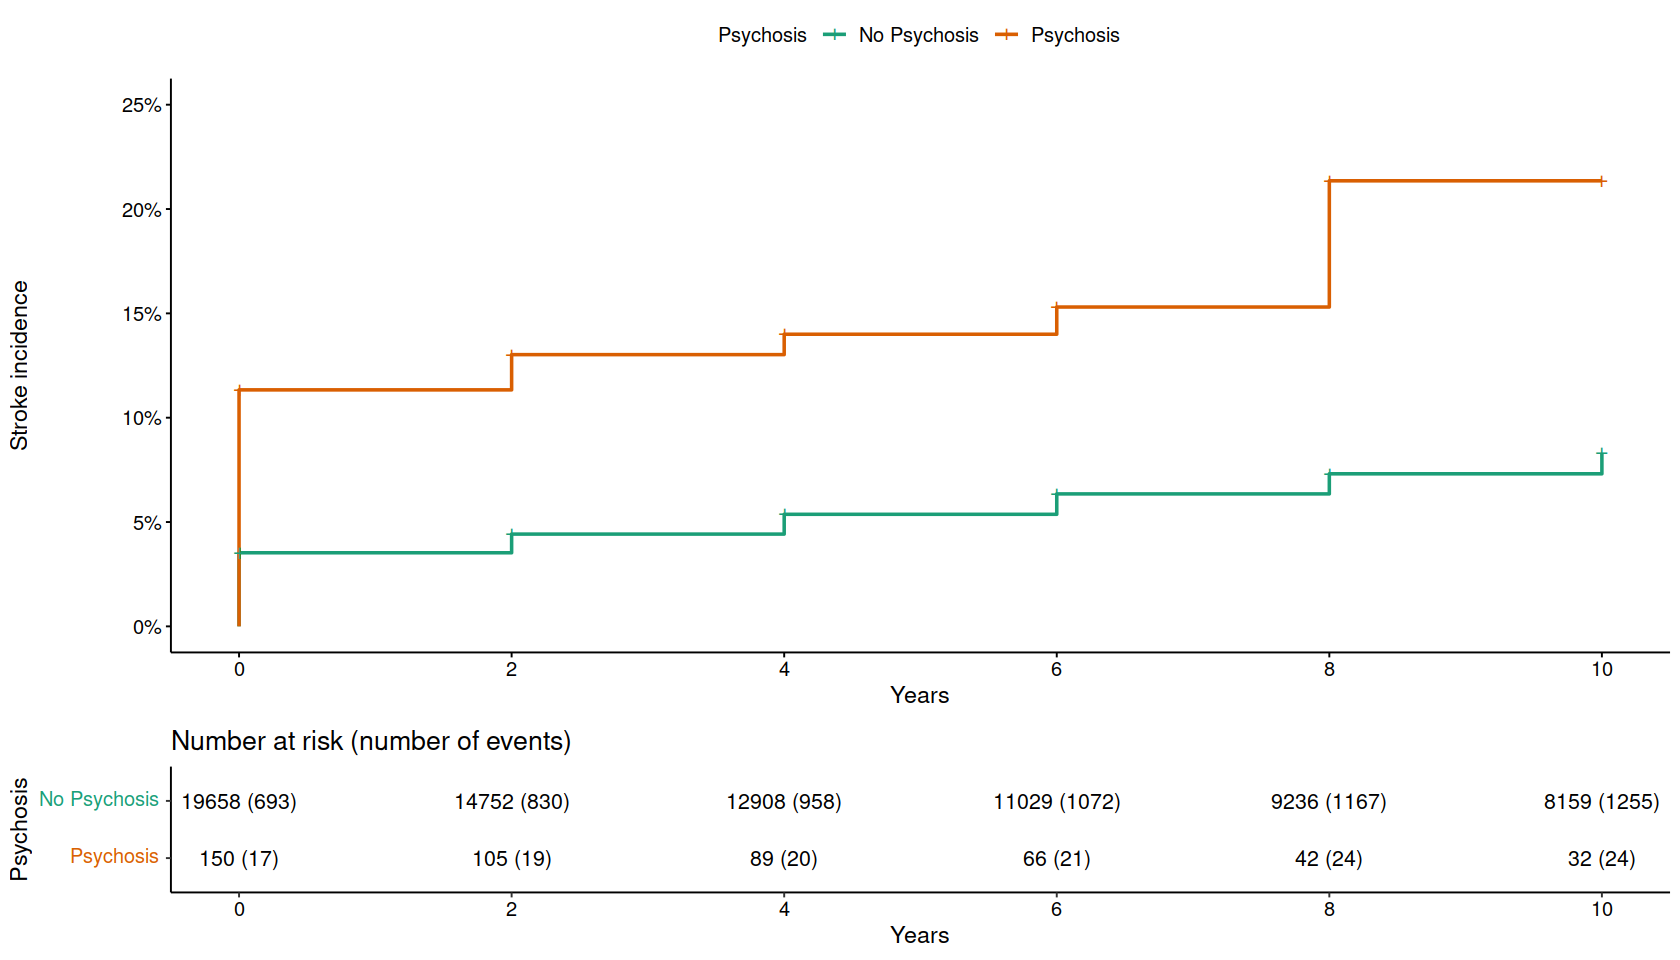

In [10]:
# Plot
figure_1 <- ggsurvplot(
  strokeinpsychosis_fit,
  data = strokeinpsychosis_censored,
  fun = "event",
  conf.int = FALSE,
  surv.scale = "percent",       # present probabilities in the y axis in %
  break.time.by = 2,            # present the time axis with an increment of 2 years
  xlab = "Years",
  ylab = "Stroke incidence",
  ylim = c(0, .25),
  xlim = c(0, 10),
  pval = TRUE,                      # print p-value of Log-rank test 
  pval.coord = c(40,.91),           # print p-value at these plot coordinates
  risk.table = "nrisk_cumevents",   # print the risk table at bottom. abs_pct = absolute numbers and percentages. Can also use "absolute" or "percentage" alone.
  legend.title = "Psychosis",       # legend characteristics
  legend.labs = c("No Psychosis","Psychosis"),
  font.legend = 12, 
  palette = "Dark2",                # specify color palette 
)

# Display
figure_1

# Save
png(file=paste(output_dir, '/', 'RB_et_al_Figure1.png', sep=''), width = 14, height = 7, units = 'in', res = 800)
figure_1
dev.off()

Calculate mean follow-up time by group

In [11]:
strokeinpsychosis_censored %>%
  filter(strokeever_10 == 1) %>%
  group_by(psychosisever_10) %>%
  summarise(mean=mean(fuptime), sd = sd(fuptime), median = median(fuptime))

psychosisever_10,mean,sd,median
<dbl>,<dbl>,<dbl>,<dbl>
0,2.478088,3.326126,0
1,1.583333,2.888006,0


### Psychosis Risk After Stroke Cox Regression Analyses

Using multiple imputation dataset

In [12]:
# Cox regression, unadjusted (imputed dataset - results the same as using the cc dataset as it is unadjusted)
psychosisinstroke_cox_cen <-  survival::coxph(
  Surv(fuptime, psychosisever_10) ~ strokeever_10, 
  data = psychosisinstroke_imp_censored
)

strokeriskafterpsychosis <- tbl_regression(psychosisinstroke_cox_cen,
                                           exponentiate = TRUE,
                                           label = strokeever_10 ~ "Psychosis risk after stroke") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

In [13]:
# Cox regression, model 1 (demographic variables)
psychosisinstroke_cox_cen_m1 <-  survival::coxph(
  Surv(fuptime, psychosisever_10) ~ strokeever_10 + w1age + sex + ethnicgroup + netwealth_q5 + frailty(idauniq),
  data = psychosisinstroke_imp_censored
)

strokeriskafterpsychosis_m1 <- tbl_regression(psychosisinstroke_cox_cen_m1,
                                              exponentiate = TRUE,
                                              include = strokeever_10,
                                              label = strokeever_10 ~ "Psychosis risk after stroke") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

In [14]:
# Cox regression, model 2 (demographic and health behaviour variables)
psychosisinstroke_cox_cen_m2 <-  survival::coxph(
  Surv(fuptime, psychosisever_10) ~ strokeever_10 + w1age + sex + ethnicgroup + netwealth_q5 + smokingbaseline + 
    alcoholbaseline + vigorousactbaseline + frailty(idauniq), 
  data = psychosisinstroke_imp_censored
)

strokeriskafterpsychosis_m2 <- tbl_regression(psychosisinstroke_cox_cen_m2,                
                                              exponentiate = TRUE,
                                              include = strokeever_10,
                                              label = strokeever_10 ~ "Psychosis risk after stroke") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

Using complete case dataset

In [15]:
# Cox regression, model 1 (demographic variables)
psychosisinstroke_cox_cen_cc_m1 <-  survival::coxph(
  Surv(fuptime, psychosisever_10) ~ strokeever_10 + w1age + sex + ethnicgroup + netwealth_q5 + frailty(idauniq),
  data = psychosisinstroke_censored
)

strokeriskafterpsychosis_cc_m1 <- tbl_regression(psychosisinstroke_cox_cen_cc_m1,                
                                                 exponentiate = TRUE,
                                                 include = strokeever_10,
                                                 label = strokeever_10 ~ "Psychosis risk after stroke") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

In [16]:
# Cox regression, model 2 (demographic and health behaviour variables)
psychosisinstroke_cox_cen_cc_m2 <-  survival::coxph(
  Surv(fuptime, psychosisever_10) ~ strokeever_10 + w1age + sex + ethnicgroup + netwealth_q5 + smokingbaseline + 
    alcoholbaseline + vigorousactbaseline + frailty(idauniq), 
  data = psychosisinstroke_censored
)

strokeriskafterpsychosis_cc_m2 <- tbl_regression(psychosisinstroke_cox_cen_cc_m2,                
                                                 exponentiate = TRUE,
                                                 include = strokeever_10,
                                                 label = strokeever_10 ~ "Psychosis risk after stroke") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

### Stroke Risk After Psychosis - Cox Regression Analyses

Using imputed dataset

In [17]:
# Cox regression, unadjusted
strokeinpsychosis_cox_cen <- survival::coxph(
  Surv(fuptime, strokeever_10) ~ psychosisever_10, 
  data = strokeinpsychosis_censored
)

psychosisriskafterstroke <- tbl_regression(strokeinpsychosis_cox_cen, 
               exponentiate = TRUE,
               label = psychosisever_10 ~ "Stroke risk after psychosis") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

In [18]:
# Cox regression, model 1 (demographic)
strokeinpsychosis_cox_cen_m1 <-  survival::coxph(
  Surv(fuptime, strokeever_10) ~ psychosisever_10 + w1age + sex + ethnicgroup + netwealth_q5 + frailty(idauniq),
  data = strokeinpsychosis_imp_censored
)

psychosisriskafterstroke_m1 <- tbl_regression(strokeinpsychosis_cox_cen_m1,                
                                              exponentiate = TRUE,
                                              include = psychosisever_10,
                                              label = psychosisever_10 ~ "Stroke risk after psychosis") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

In [19]:
# Cox regression, model 2 (demographic and health behaviour variables)
strokeinpsychosis_cox_cen_m2 <-  survival::coxph(
  Surv(fuptime, strokeever_10) ~ psychosisever_10 + w1age + sex + ethnicgroup + netwealth_q5 + smokingbaseline + 
    alcoholbaseline + vigorousactbaseline + frailty(idauniq), 
  data = strokeinpsychosis_imp_censored
)

psychosisriskafterstroke_m2 <- tbl_regression(strokeinpsychosis_cox_cen_m2,                
                                              exponentiate = TRUE,
                                              include = psychosisever_10,
                                              label = psychosisever_10 ~ "Stroke risk after psychosis") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

Using complete case dataset

In [20]:
# Cox regression, model 1 (demographic)
strokeinpsychosis_cox_cen_cc_m1 <-  survival::coxph(
  Surv(fuptime, strokeever_10) ~ psychosisever_10 + w1age + sex + ethnicgroup + netwealth_q5 + frailty(idauniq),
  data = strokeinpsychosis_censored
)

psychosisriskafterstroke_cc_m1 <- tbl_regression(strokeinpsychosis_cox_cen_cc_m1,                
                                                 exponentiate = TRUE,
                                                 include = psychosisever_10,
                                                 label = psychosisever_10 ~ "Stroke risk after psychosis") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

In [21]:
# Cox regression, model 2 (demographic and health behaviour variables)
strokeinpsychosis_cox_cen_cc_m2 <-  survival::coxph(
  Surv(fuptime, strokeever_10) ~ psychosisever_10 + w1age + sex + ethnicgroup + netwealth_q5 + smokingbaseline + 
    alcoholbaseline + vigorousactbaseline + frailty(idauniq), 
  data = strokeinpsychosis_censored
)

psychosisriskafterstroke_cc_m2 <- tbl_regression(strokeinpsychosis_cox_cen_cc_m2,                
                                              exponentiate = TRUE,
                                              include = psychosisever_10,
                                              label = psychosisever_10 ~ "Stroke risk after psychosis") %>%
  modify_column_merge(pattern = "{estimate} ({ci}) [{p.value}]")

#### Merge tables and display

In [22]:
# Using imputed datasets
strokerisk_tab <- tbl_merge(tbls=list(strokeriskafterpsychosis, strokeriskafterpsychosis_m1, strokeriskafterpsychosis_m2),
                            tab_spanner = c( "**Unadjusted**", "**Adjusted, model 1**", "**Adjusted, model 2**"))
psychosisrisk_tab <- tbl_merge(tbls=list(psychosisriskafterstroke, psychosisriskafterstroke_m1, psychosisriskafterstroke_m2),
                               tab_spanner = c( "**Unadjusted**", "**Adjusted, model 1**", "**Adjusted, model 2**"))

# Using complete case datasets
strokerisk_cc_tab <- tbl_merge(tbls = list(strokeriskafterpsychosis, strokeriskafterpsychosis_cc_m1, strokeriskafterpsychosis_cc_m2),
                               tab_spanner = c( "**Unadjusted**", "**Adjusted, model 1**", "**Adjusted, model 2**"))
psychosisrisk_cc_tab <- tbl_merge(tbls = list(psychosisriskafterstroke, psychosisriskafterstroke_cc_m1, psychosisriskafterstroke_cc_m2),
                                  tab_spanner = c( "**Unadjusted**", "**Adjusted, model 1**", "**Adjusted, model 2**"))

#### Table 3. Hazard ratios estimates for stroke risk after psychosis and psychosis risk after stroke

In [23]:
# Imputed
survivalanalysis_tab <- tbl_stack(tbls = list(psychosisrisk_tab, strokerisk_tab))

table_3_filename = paste(output_dir, "RB_et_al_table_3.html", sep="")
gt::gtsave(as_gt(survivalanalysis_tab), file = table_3_filename)
display_html(file = table_3_filename)

<!DOCTYPE html>
 
 
 



 
 
 
 
 
 
 
 
 Characteristic 
 
 Unadjusted 
 
 
 Adjusted, model 1 
 
 
 Adjusted, model 2 
 
 
 
 HR 1 
 HR 1 
 HR 1 
 
 
 
 Stroke risk after psychosis 
 2.87 (1.91, 4.29) [<0.001] 
 3.86 (2.44, 6.08) [<0.001] 
 3.60 (2.23, 5.80) [<0.001] 
 Psychosis risk after stroke 
 3.08 (1.99, 4.77) [<0.001] 
 5.16 (2.74, 9.72) [<0.001] 
 5.50 (2.76, 11.0) [<0.001] 
 
 
 
 
 1 HR = Hazard Ratio

#### Supplementary Table 4. Hazard ratios estimates for stroke risk after psychosis and psychosis risk after stroke (complete-case)

In [24]:
# Complete case
survivalanalysis_cc_tab <- tbl_stack(tbls = list(psychosisrisk_cc_tab, strokerisk_cc_tab))

suppl_table_4_filename = paste(output_dir, "RB_et_al_suppl_table_4.html", sep="")
gt::gtsave(as_gt(survivalanalysis_tab), file = suppl_table_4_filename)
display_html(file = suppl_table_4_filename)

<!DOCTYPE html>
 
 
 



 
 
 
 
 
 
 
 
 Characteristic 
 
 Unadjusted 
 
 
 Adjusted, model 1 
 
 
 Adjusted, model 2 
 
 
 
 HR 1 
 HR 1 
 HR 1 
 
 
 
 Stroke risk after psychosis 
 2.87 (1.91, 4.29) [<0.001] 
 3.86 (2.44, 6.08) [<0.001] 
 3.60 (2.23, 5.80) [<0.001] 
 Psychosis risk after stroke 
 3.08 (1.99, 4.77) [<0.001] 
 5.16 (2.74, 9.72) [<0.001] 
 5.50 (2.76, 11.0) [<0.001] 
 
 
 
 
 1 HR = Hazard Ratio

## Analysis platform details and software versions

In [25]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          2.0                         
year           2022                        
month          04                          
day            22                          
svn rev        82229                       
language       R                           
version.string R version 4.2.0 (2022-04-22)
nickname       Vigorous Calisthenics       

In [26]:
packageVersion("dplyr")

[1] ‘1.0.9’

In [27]:
packageVersion("survival")

[1] ‘3.2.13’

In [28]:
packageVersion("survminer")

[1] ‘0.4.9’

In [29]:
packageVersion("gtsummary")

[1] ‘1.6.2’

In [30]:
packageVersion("gt")

[1] ‘0.7.0’

In [31]:
packageVersion("IRdisplay")

[1] ‘1.1’

In [32]:
packageVersion("webshot2")

[1] ‘0.1.0’